In [1]:
!pip install gurobipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.9 MB 5.4 MB/s 


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:

import os
import sys
# path = os.path.dirname(os.getcwd())
# sys.path.insert(0, path)

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/SVR_CG')
from Codes.model import *
from Codes.utils import *

from scipy import stats
import pickle
sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsResult')
RESULT_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsResult"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/Datasets')
DATA_DIR = "/content/gdrive/MyDrive/SVR_Codes/Datasets"

sys.path.append('/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo')
DATAINFO_DIR = "/content/gdrive/MyDrive/SVR_Codes/DatasetsInfo"

import warnings
warnings.filterwarnings("ignore")

from sklearn import datasets

from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv(os.path.join(DATA_DIR, 'auto-mpg.data'), header=None, delim_whitespace=True) 


In [ ]:
df

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [4]:
df = pd.read_csv(os.path.join(DATA_DIR, 'auto-mpg.data'), header=None, delim_whitespace=True )
df= df.replace('?', np.nan)
df = df.dropna(axis = 0)
f = 7
K = 3
X = df.iloc[:,1:f+1]
y = df.iloc[:,0:1]

cols = [ 'X' + str(i+1) for i in range(f) ]
cols+=['Y']

scaler = StandardScaler()
df_data = scaler.fit_transform(np.c_[X,y])
df_data = pd.DataFrame(df_data, columns = cols)



In [ ]:

# EM Greedy

weights_list_greedy = []
bias_list_greedy = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    greedy = CLR(K =K , f = f, max_iter= 30, compute = True, random_state=seed )
    greedy.set_model(Cl_SVR_greedy(Kmeans_init = False, outputFlag=False, tol = 0.1, time = 0.5, step_plots=False))

    greedy.fit(df_data )


    time_list.append(greedy.run_time) 
    epsVal_list.append(greedy.model_optVal)
    weights_list_greedy.append(greedy.weights)
    bias_list_greedy.append(greedy.bias)


print("\n\nResults for EM Greedy" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_greedy = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for EM Greedy: ", epsVal_result_greedy)


time_result_greedy = np.mean(time_list)
print("Average time taken for EM Greedy ", time_result_greedy, "\n")

Clusterwise-Regression model with SVR - Greedy algorithm
# of outliers:  0
Iteration:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 30
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeL

In [ ]:

# KM LR Greedy

weights_list_kmlr = []
bias_list_kmlr = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kmlr = CLR(K =K , f = f, random_state=seed )
    kmlr.set_model(km_lr())
    kmlr.fit(df_data )

    time_list.append(kmlr.run_time) 
    epsVal_list.append(kmlr.model_optVal)
    weights_list_kmlr.append(kmlr.weights)
    bias_list_kmlr.append(kmlr.bias)


print("\n\nResults for kmlr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmlr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmlr: ", epsVal_result_kmlr)


time_result_kmlr = np.mean(time_list)
print("Average time taken for kmlr ", time_result_kmlr, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.4976504480486108


Results for kmlr



In [ ]:

# KM SVR Greedy

weights_list_kmsvr = []
bias_list_kmsvr = []
metrics_list = []
time_list=[]
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmsvr = CLR(K =K , f = f, random_state=seed )
    kmsvr.set_model(km_svr(epsilon = 0.7))
    kmsvr.fit(df_data )

    time_list.append(kmsvr.run_time) 
    epsVal_list.append(kmsvr.model_optVal)
    weights_list_kmsvr.append(kmsvr.weights)
    bias_list_kmsvr.append(kmsvr.bias)


print("\n\nResults for kmsvr" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmsvr = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmsvr ", epsVal_result_kmsvr)


time_result_kmsvr = np.mean(time_list)
print("Average time taken for kmsvr ", time_result_kmsvr, "\n")

49
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
169
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
194
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
72
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
157
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
49
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
16
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
128
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
251
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxError:  1.3759745978020301
246
Clusterwise-Regression model with KM+SVR algorithm
# of outliers:  0
MaxE

In [5]:

# KM et Greedy

weights_list_kmet = []
bias_list_kmet = []
metrics_list = []
time_list=[]
epsVal_list = []


for j in range(10):
    seed = np.random.randint(2**8)
    print(seed)
    kmet = CLR(K =K , f = f, compute = True, random_state=seed )
    kmet.set_model(km_et(outputFlag= False))
    kmet.fit(df_data )

    time_list.append(kmet.run_time) 
    epsVal_list.append(kmet.model_optVal)
    weights_list_kmet.append(kmet.weights)
    bias_list_kmet.append(kmet.bias)


print("\n\nResults for kmet" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kmet = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for kmet ", epsVal_result_kmet)


time_result_kmet = np.mean(time_list)
print("Average time taken for kmet ", time_result_kmet, "\n")

206
Clusterwise-Regression model with Kmeans-et
# of outliers:  0
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
Set parameter TimeLimit to value 60
Set pa

In [6]:


with open(os.path.join(RESULT_DIR, 'Autompg3.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmet, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmet, outp, pickle.HIGHEST_PROTOCOL)



In [ ]:

# kplane Greedy

weights_list_kp = []
bias_list_kp = []
time_list = []
epsVal_list = []

for j in range(10):
    seed = np.random.randint(2**8)

    kp = CLR(K =K , f = f, max_iter= 20, random_state=seed )
    kp.set_model(k_plane())
    kp.fit(df_data )

    time_list.append(kp.run_time) 
    epsVal_list.append(kp.model_optVal)
    weights_list_kp.append(kp.weights)
    bias_list_kp.append(kp.bias)


print("\n\nResults for k plane" )

print('\nMean, sd, low_ci, high_ci')


epsVal_ci_low, epsVal_ci_high = stats.t.interval(0.95, len(epsVal_list)-1, loc=np.mean(epsVal_list), scale=stats.sem(epsVal_list))
epsVal_result_kp = [np.mean(epsVal_list), np.std(epsVal_list), epsVal_ci_low, epsVal_ci_high]
print("EpsVal for k plane: ", epsVal_result_kp)


time_result_kp = np.mean(time_list)
print("Average time taken for k plane ", time_result_kp, "\n")

Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.026300497700084
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8585393177690697
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.668891558161611
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.0074767676401237
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1230303564445117
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.041242792405021
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.1161964923927918
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  0.8101426430547114
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.047547747935828
Clusterwise-Regression model with KM+LR algorithm
# of outliers:  0
MaxError:  1.2962163769225263


Results for k plane

M

In [ ]:

# Clusterwise SVR with constraint generation 

optcg = CLR(K =K , f = f, max_iter= 20, compute = True, random_state=243)
optcg.set_model(Cl_SVR_Cg(outputFlag=False, initConstrCnt=25, optimalGap= 0.05, tol = 0.2, time = 2, initConstrIntRatio= 4, outliersCnt = 0, step_plots=False))

optcg.fit(df_data )


weights_optcg = optcg.weights
bias_optcg = optcg.bias
optgap_optcg = optcg.model_optGap
optVal_optcg = optcg.model_optVal


print("\n\nResults for CG" )

print("EpsVal for CG: ", optVal_optcg)

time_result_optcg = optcg.run_time
print("Time taken for CG ", time_result_optcg, "\n")


Clusterwise-Regression model with SVR - Constraint generation
# of outliers:  0
greedy objective:  0.14952876524948744
greedy objective:  0.1364232483931129
greedy objective:  0.2508676187977541
greedy objective:  0.2502884302312225
greedy objective kmlr:  0.25538999003279345
Max error for warm starting model:  0.695323296505316
Number of WS constraints:  93
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-1.16503965  2.2141447  -0.61170441 -1.40904644  0.14368087  0.38681849
   0.33439966]
 [-0.15907951 -0.27931729 -0.02172463 -0.2191875  -0.24279238  0.25969411
   0.15513046]
 [ 0.47261965 -0.2013136  -0.92481837 -0.33728498 -0.01736697  0.41966722
   0.15684243]]
b at WS:  [[ 0.35873335]
 [-0.08072012]
 [-0.31028444]]
Set parameter TimeLimit to value 120
Set parameter MIPGap to value 0.05
Academic license - for non-commercial use only 

Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective:  0.14498826154501546
greedy objective:  0.1422808422482061
greedy objective:  0.24414894099154644
greedy objective:  0.25026080355080543
greedy objective kmlr:  0.25538999003279345
Max error for warm starting model:  1.0321098641258528
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.47359253  0.97439988 -0.39871268 -1.11853471 -0.12791145  0.42056363
  -0.01255718]
 [-0.24696743 -0.17065347 -0.01757561 -0.16337509 -0.19189414  0.24884151
   0.61549481]
 [ 0.30355615 -0.25818979  0.05005889 -0.76411191  0.56962459  0.33009375
  -0.06583016]]
b at WS:  [[-0.02532542]
 [ 0.16598765]
 [-0.15919369]]
Set parameter TimeLimit to value 600
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto

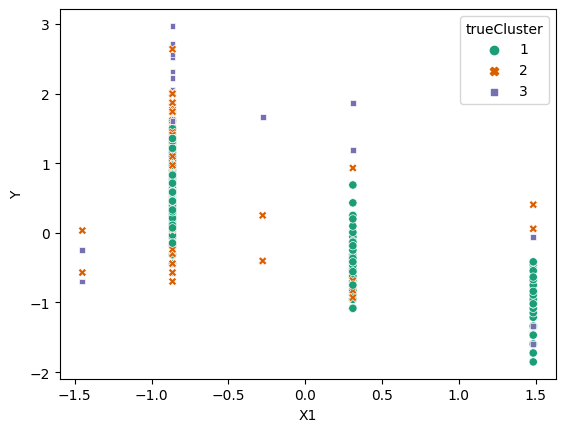

Solution reached with Cost:  0.41691978298319254


Results for full MILP
EpsVal for full MILP:  0.41691978298319254
Time taken for full MILP  600.2444423880002 



In [ ]:

# Clusterwise SVR with full MILP

optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = 10))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


Clusterwise-Regression model with SVR - MILP
# of outliers:  0
greedy objective kmlr:  0.25538999003279345
Best WS is kmlr
Max error for warm starting model:  1.4976504480486108
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 874321
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
w at WS:  [[-0.10293943  0.09756865 -0.12301657 -0.23144404 -0.06945149  0.18725326
   1.54646472]
 [ 0.03585718 -0.01642604 -0.63591628 -0.54829389 -0.14375623  0.37049902
   0.23517604]
 [ 0.16074822  0.07545292 -0.04114119 -0.97042748  0.19303005  0.47704851
  -0.06543802]]
b at WS:  [[ 0.53330251]
 [-0.14260115]
 [ 0.0843919 ]]
Set parameter TimeLimit to value 1561.3152
Set parameter MIPGap to value 0.1
Academic license - for non-commercial use only - registered to aravinth.chembu@mail.utoronto.ca
E:  0.41691978298319254


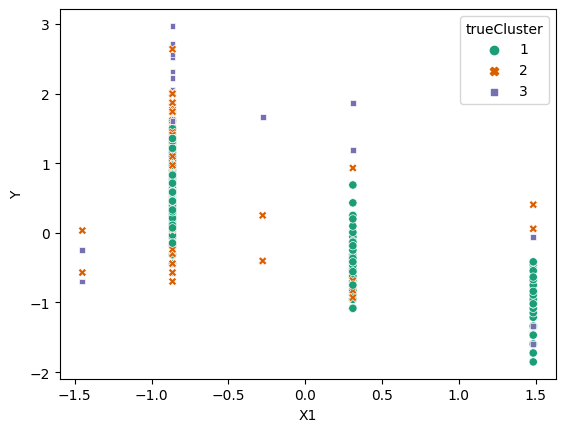

Solution reached with Cost:  0.41691978298319254


Results for full MILP
EpsVal for full MILP:  0.41691978298319254
Time taken for full MILP  1561.573324209 



In [ ]:

# Clusterwise SVR with full MILP (time of cg)
time_result_optcg = 1561.3152
optmilp = CLR(K =K , f = f,compute = True, random_state=243)
optmilp.set_model(Cl_SVR_milp(outputFlag=False, WarmStart=True, optimalGap= 0.1, time = time_result_optcg/60))

optmilp.fit(df_data )

weights_optmilp = optmilp.weights
bias_optmilp = optmilp.bias
optgap_optmilp= optmilp.model_optGap
optVal_optmilp = optmilp.model_optVal


print("\n\nResults for full MILP" )

print("EpsVal for full MILP: ", optVal_optmilp)

time_result_optmilp = optmilp.run_time
print("Time taken for full MILP ", time_result_optmilp, "\n")


In [ ]:


with open(os.path.join(RESULT_DIR, 'Autompg2.pkl'), 'wb') as outp:

    pickle.dump(weights_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmsvr, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)


In [ ]:

# Save the final results 


with open(os.path.join(RESULT_DIR, 'Autompg.pkl'), 'wb') as outp:



    pickle.dump(weights_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_greedy, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_greedy, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kmlr, outp, pickle.HIGHEST_PROTOCOL)
    
    pickle.dump(weights_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_list_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_kp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(epsVal_result_kp, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optcg, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optcg, outp, pickle.HIGHEST_PROTOCOL)

    pickle.dump(weights_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(bias_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(time_result_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optgap_optmilp, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(optVal_optmilp, outp, pickle.HIGHEST_PROTOCOL)



n, d = X.shape

with open(os.path.join(DATAINFO_DIR, 'Autompg.pkl'), 'wb') as outp:

    pickle.dump(n, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(d, outp, pickle.HIGHEST_PROTOCOL)
    pickle.dump(K, outp, pickle.HIGHEST_PROTOCOL)

